<a href="https://colab.research.google.com/github/Tosinayoojo/Employee-Promotion/blob/main/Employee_Promotion_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd

## Load Dataset

In [ ]:
df  = pd.read_csv("/content/employee_promotion.csv") #loading the dataset

In [ ]:
df.head(5) #prints the first 5 rows in the dataset

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [ ]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [ ]:
df.shape #shows how many rows and columns are in the dataset

(54808, 13)

In [ ]:
df.info() #gives a breakdown on the dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


# Data Pre-processing

In [ ]:
dfemp = df.copy() #make a copy of the dataset

In [ ]:
dfemp.shape #check the count of the copy dataset

(54808, 13)

## Drop Rows

In [ ]:
dfemp = dfemp.drop_duplicates(dfemp) #attempt to drow duplicates in the dataset

In [ ]:
dfemp.shape #checking the new shape of the dataset

(54808, 13)

## Drop column

In [ ]:
dfemp.drop('employee_id', axis=1, inplace=True) #dropping the employee_id column

## Missing Values

In [ ]:
dfemp.isnull() #check for missing values

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,False,False,False,False,False,False,False,False,False,False,False,False
54804,False,False,False,False,False,False,False,False,False,False,False,False
54805,False,False,False,False,False,False,False,False,False,False,False,False
54806,False,False,True,False,False,False,False,False,False,False,True,False


In [ ]:
dfemp.isnull().sum() #prints a sum of missing values in each column of the dataset

,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0
awards_won,0


In [ ]:
dfemp['education'].fillna('unknown', inplace = True) #fill missing values in education with unknwon.

In [ ]:
print(dfemp[['previous_year_rating', 'avg_training_score']].dtypes) #checking the data types of specific columns

previous_year_rating    float64
avg_training_score      float64
dtype: object


In [ ]:
dfemp[['previous_year_rating', 'avg_training_score']] = dfemp[['previous_year_rating', 'avg_training_score']].apply(lambda x: x.fillna(x.median()))  # Fill missing values in specific columns with their respective medians

In [ ]:
dfemp.isnull().sum() #checking the sum of missing values in each column

,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0
awards_won,0


In [ ]:
# @title change characters

# Convert the 'float_values' column from floats to integers
dfemp['previous_year_rating'] = dfemp['previous_year_rating'].astype(int)
dfemp['avg_training_score'] = dfemp['avg_training_score'].astype(int)

the code above changes the data type from float to integers

In [ ]:
dfemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   department            54808 non-null  object
 1   region                54808 non-null  object
 2   education             54808 non-null  object
 3   gender                54808 non-null  object
 4   recruitment_channel   54808 non-null  object
 5   no_of_trainings       54808 non-null  int64 
 6   age                   54808 non-null  int64 
 7   previous_year_rating  54808 non-null  int64 
 8   length_of_service     54808 non-null  int64 
 9   awards_won            54808 non-null  int64 
 10  avg_training_score    54808 non-null  int64 
 11  is_promoted           54808 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 5.0+ MB


# Exploratory Data Analysis

In [ ]:
dfemp.keys() #checking the names of columns in the dataset

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

## Categorical vs Numerical Columns

Split the dfemp dataset into categorical and numerical variables

In [ ]:
dfemp_num = dfemp.select_dtypes(include=['int64', 'float64']) #seperates the numerical variables into a seperate dataframe
dfemp_cat = dfemp.select_dtypes(exclude=['int64', 'float64']) #seperates categorical variables into a seperate dataframe

### Numerical Data

#### Class distribution

In [ ]:
# Display the original class distribution
dfemp['is_promoted'].value_counts()

,count
is_promoted,
0,50140
1,4668


There is a class imbalance in the dataset which will result in data sampling technique being adopted.

In [ ]:
# importing necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

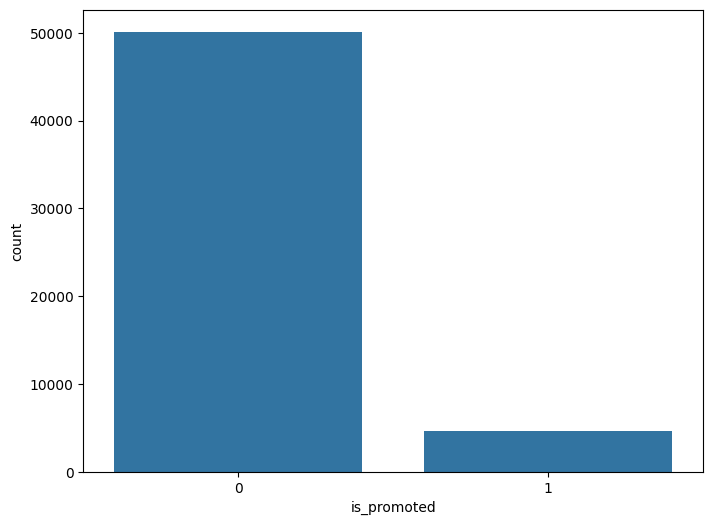

In [ ]:
# visualizing the class imbalance observed
plt.figure(figsize=(8,6))
sns.countplot(x='is_promoted', data=dfemp);

The figure above gives us a visual representation of the class imbalance in the dataset.

#### Normalization Test


Column: no_of_trainings
Mean: 1.253010509414684
Standard Deviation: 0.6092640176487825
Skewness: 3.445433937567454
Kurtosis: 18.74008184650997


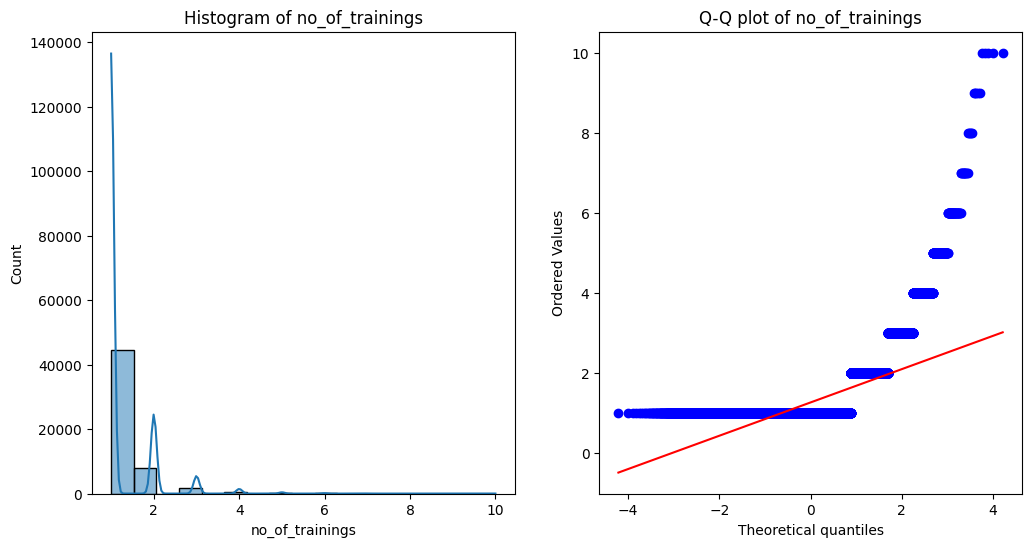


Column: age
Mean: 34.80391548679025
Standard Deviation: 7.660169201585491
Skewness: 1.0074317710382241
Kurtosis: 0.7923533691940756


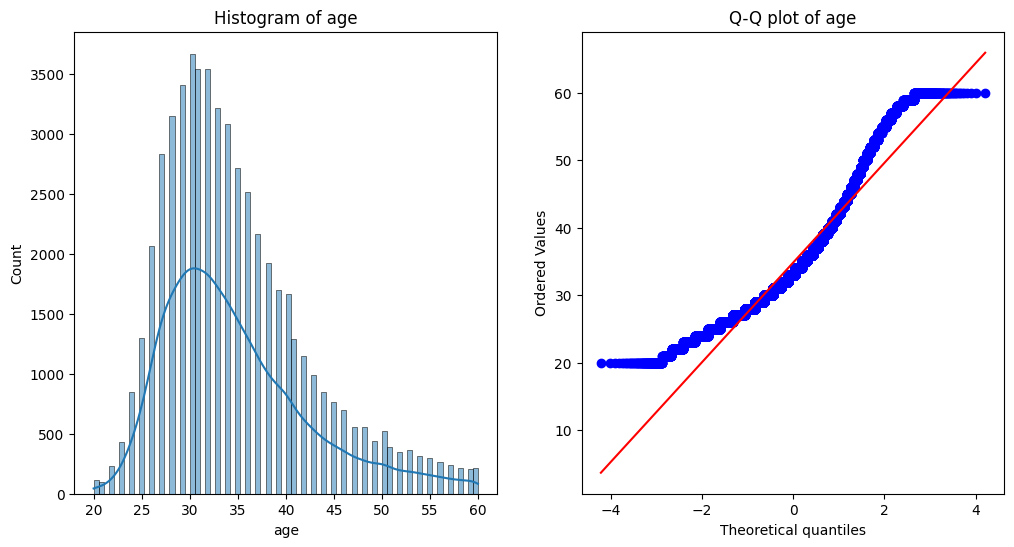


Column: previous_year_rating
Mean: 3.3044810976499783
Standard Deviation: 1.2147698843492059
Skewness: -0.2608580288123413
Kurtosis: -0.5928105773788475


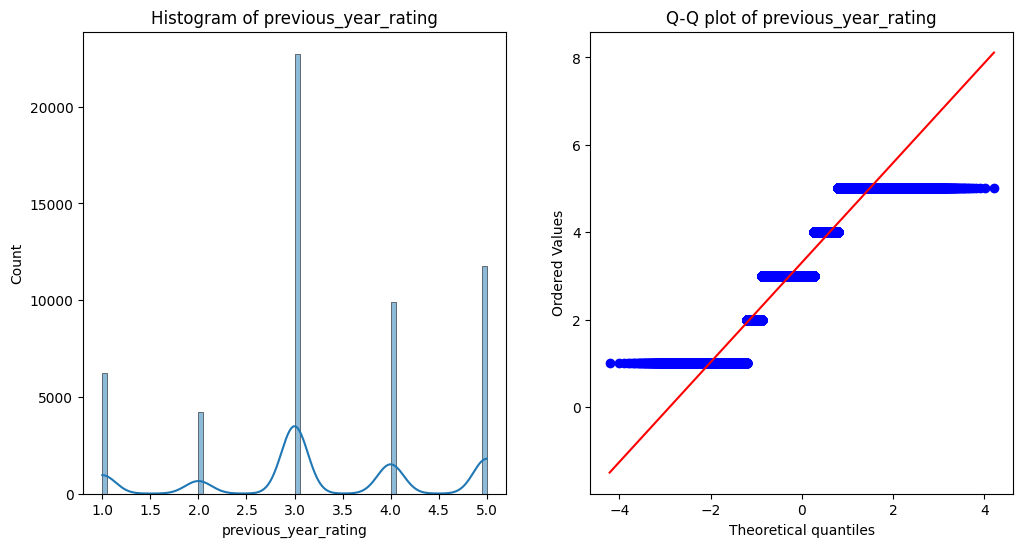


Column: length_of_service
Mean: 5.865512333965844
Standard Deviation: 4.265094179685835
Skewness: 1.738061458740809
Kurtosis: 4.414031376098643


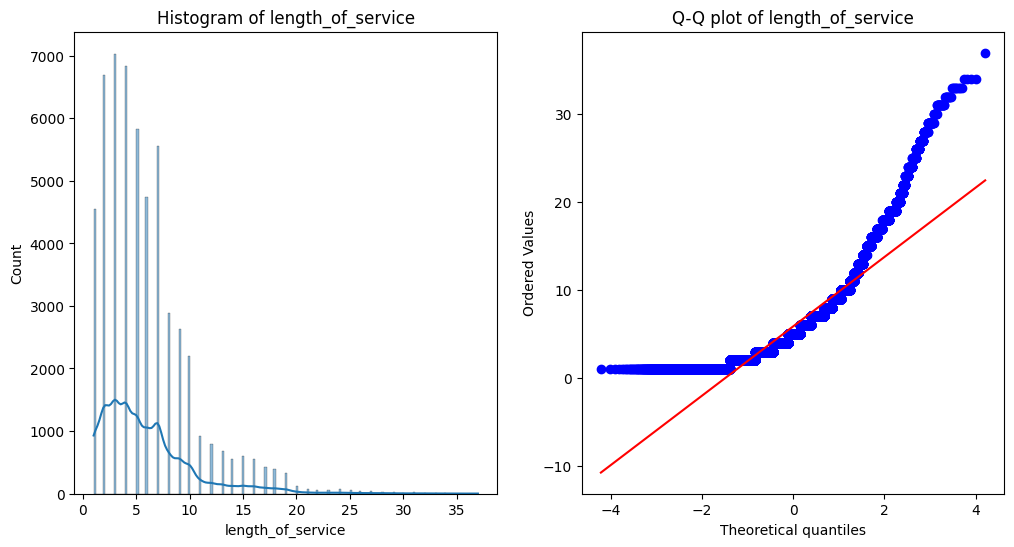


Column: awards_won
Mean: 0.023171799737264635
Standard Deviation: 0.15045025897775127
Skewness: 6.338913659392756
Kurtosis: 38.1832197246625


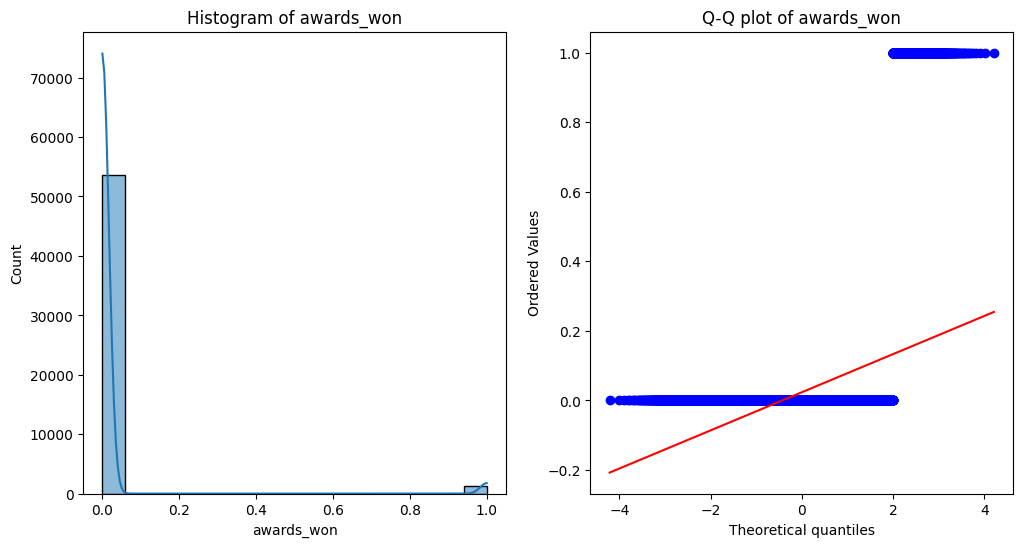


Column: avg_training_score
Mean: 63.538844694205224
Standard Deviation: 13.225552361761931
Skewness: 0.4653437614426726
Kurtosis: -1.0305379669313557


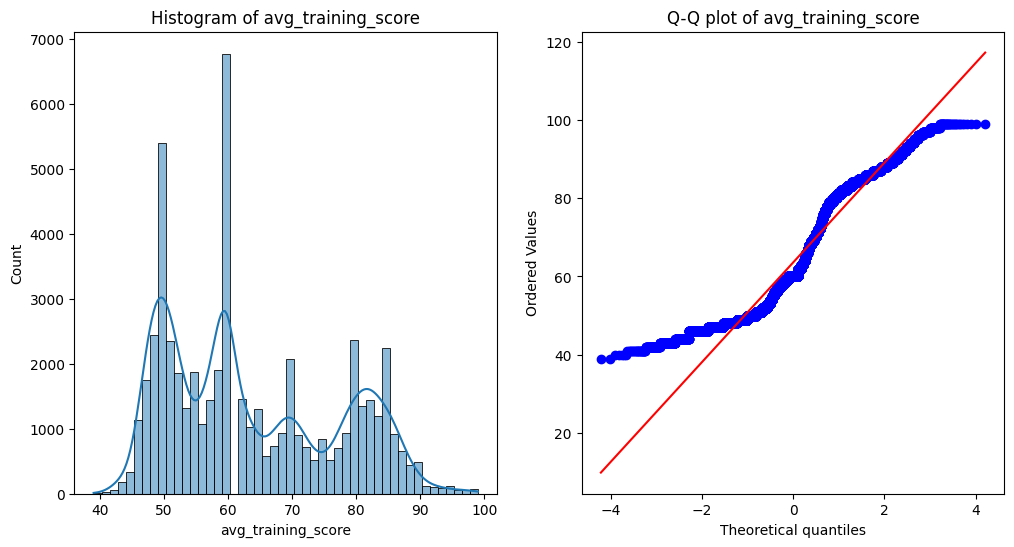


Column: is_promoted
Mean: 0.08517004816815063
Standard Deviation: 0.279137121695472
Skewness: 2.9723390958099434
Kurtosis: 6.835049117084784


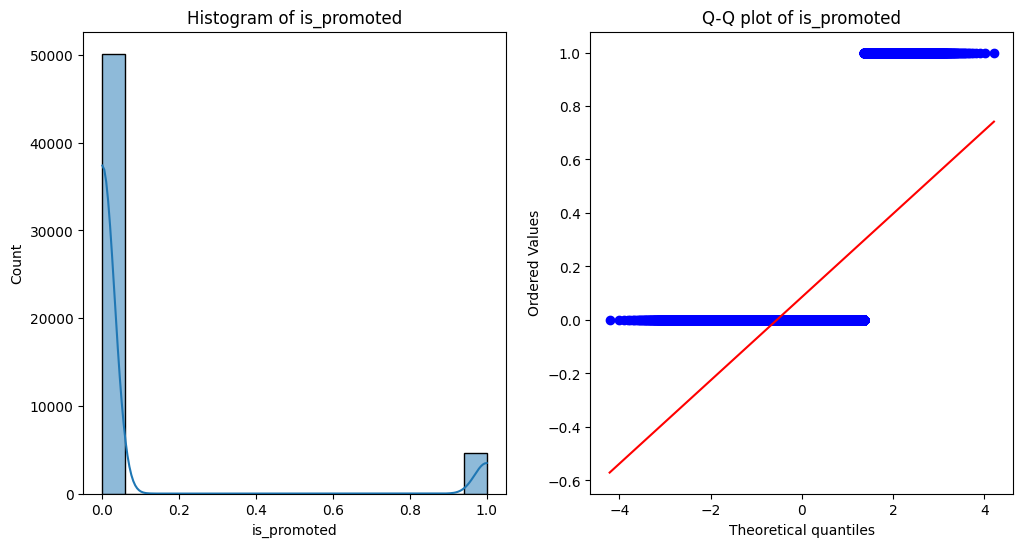

In [ ]:
def check_normalization(df):
    for column in dfemp_num.columns:
        print(f"\nColumn: {column}")

        # Statistical measures
        mean = dfemp_num[column].mean()
        std = dfemp_num[column].std()
        skew = dfemp_num[column].skew()
        kurt = dfemp_num[column].kurt()

        print(f"Mean: {mean}")
        print(f"Standard Deviation: {std}")
        print(f"Skewness: {skew}")
        print(f"Kurtosis: {kurt}")

        # Histogram
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(dfemp_num[column], kde=True)
        plt.title(f'Histogram of {column}')

        # Q-Q plot
        plt.subplot(1, 2, 2)
        stats.probplot(dfemp_num[column], dist="norm", plot=plt)
        plt.title(f'Q-Q plot of {column}')

        plt.show()

# Check normalization for the DataFrame
check_normalization(dfemp_num)

Most of the data shows they arent normally distributed.

#### Visualize

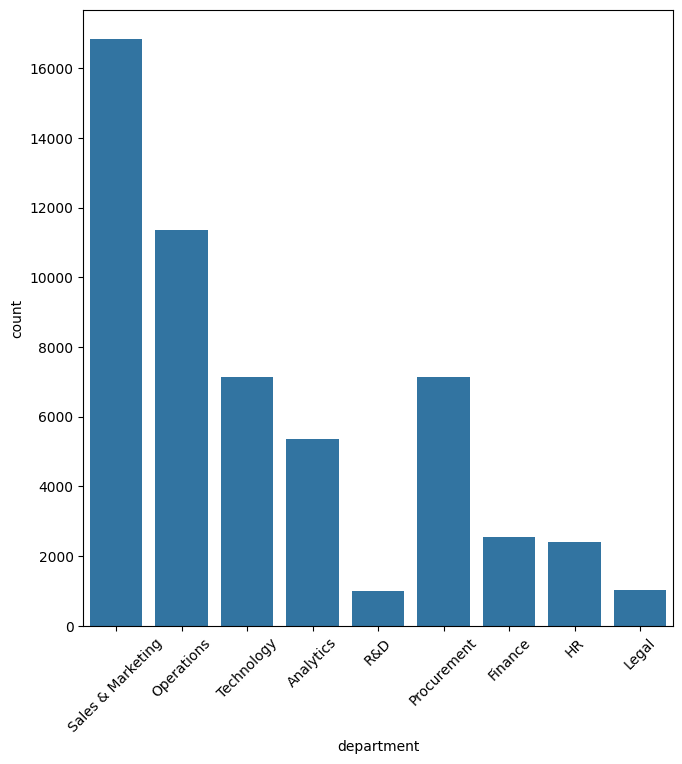

In [ ]:
# visualize the department count

plt.figure(figsize=(35,8));
plt.subplot( 1, 4, 1 );
sns.countplot(x='department', data=dfemp_cat);
plt.xticks(rotation=45);

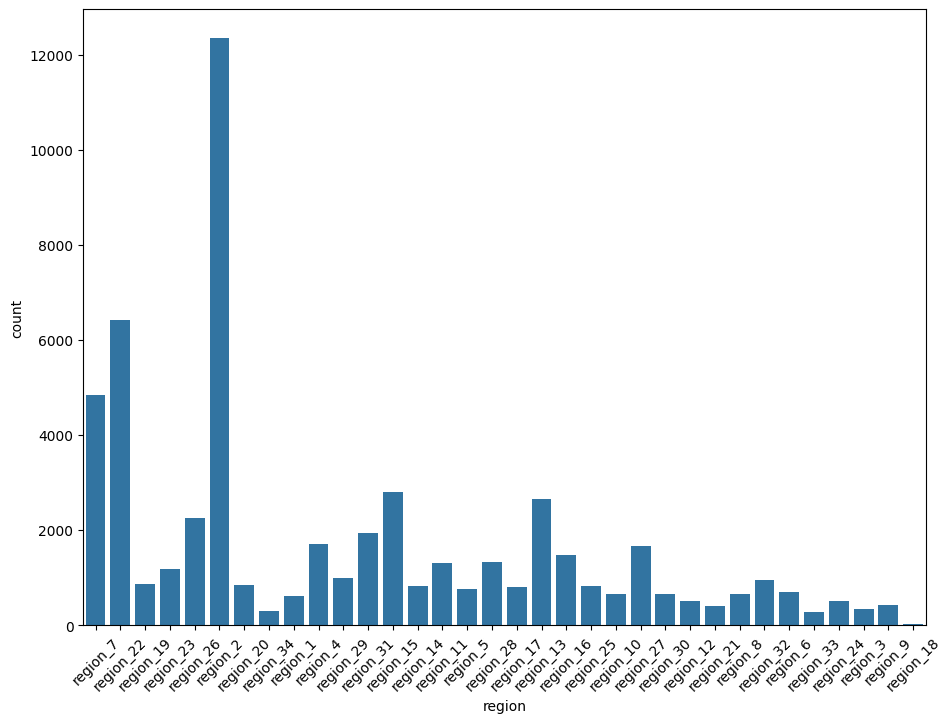

In [ ]:
#visualize region count

plt.figure(figsize=(50,8));
plt.subplot( 1, 4, 2 );
sns.countplot( x='region',  data=dfemp_cat);
plt.xticks(rotation=45);

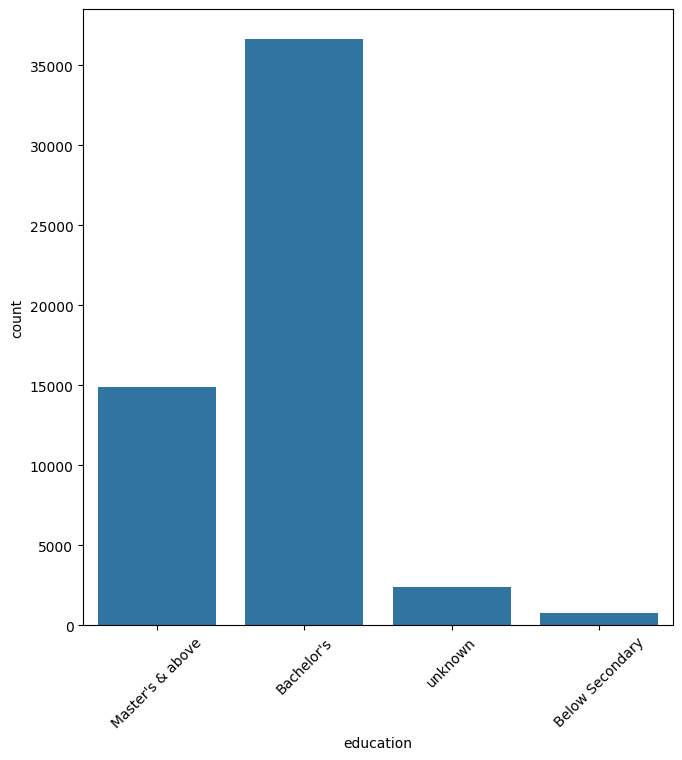

In [ ]:
#visualize education count

plt.figure(figsize=(35,8));
plt.subplot( 1, 4, 3 );
sns.countplot( x='education', data=dfemp_cat);
plt.xticks(rotation=45);

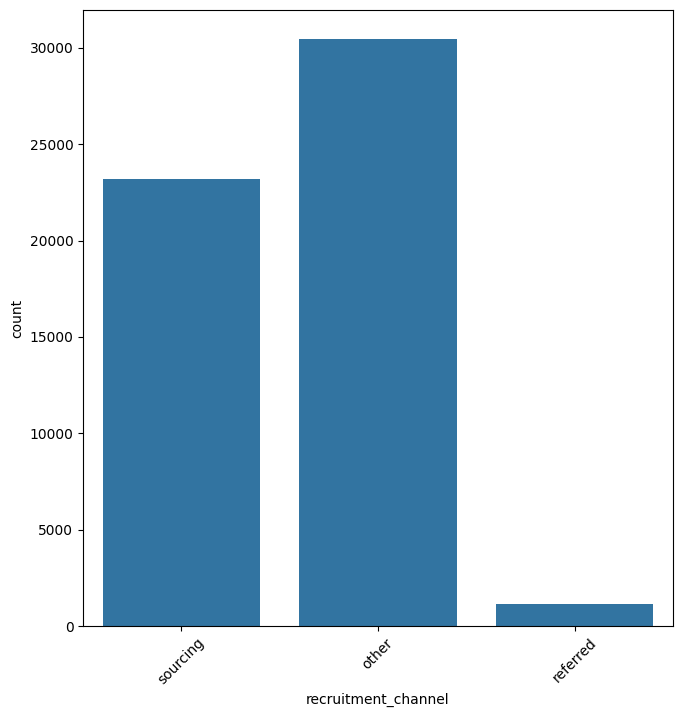

In [ ]:
#visualize recruitment channels

plt.figure(figsize=(35,8));
plt.subplot( 1, 4, 4 );
sns.countplot( x='recruitment_channel', data=dfemp_cat);
plt.xticks(rotation=45);

#### Corellation

In [ ]:
dfemp_num.corr() #checking correlation of variables to one another

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
no_of_trainings,1.000000,-0.081278,-0.061564,-0.057275,-0.007628,0.044478,-0.024896
age,-0.081278,1.000000,0.026810,0.657111,-0.008169,-0.048809,-0.017166
previous_year_rating,-0.061564,0.026810,1.000000,0.023504,0.026587,0.069457,0.153230
length_of_service,-0.057275,0.657111,0.023504,1.000000,-0.039927,-0.038577,-0.010670
awards_won,-0.007628,-0.008169,0.026587,-0.039927,1.000000,0.073116,0.195871
avg_training_score,0.044478,-0.048809,0.069457,-0.038577,0.073116,1.000000,0.181214
is_promoted,-0.024896,-0.017166,0.153230,-0.010670,0.195871,0.181214,1.000000


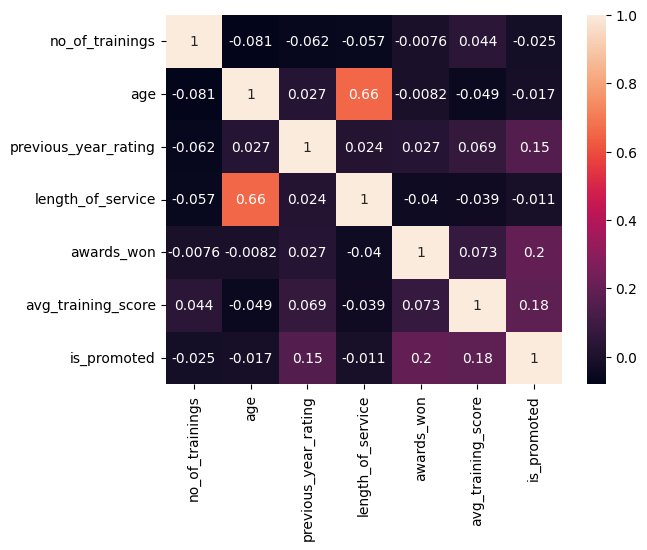

In [ ]:
# Plotting a Heatmap
sns.heatmap(dfemp_num.corr(), annot=True)
plt.show()

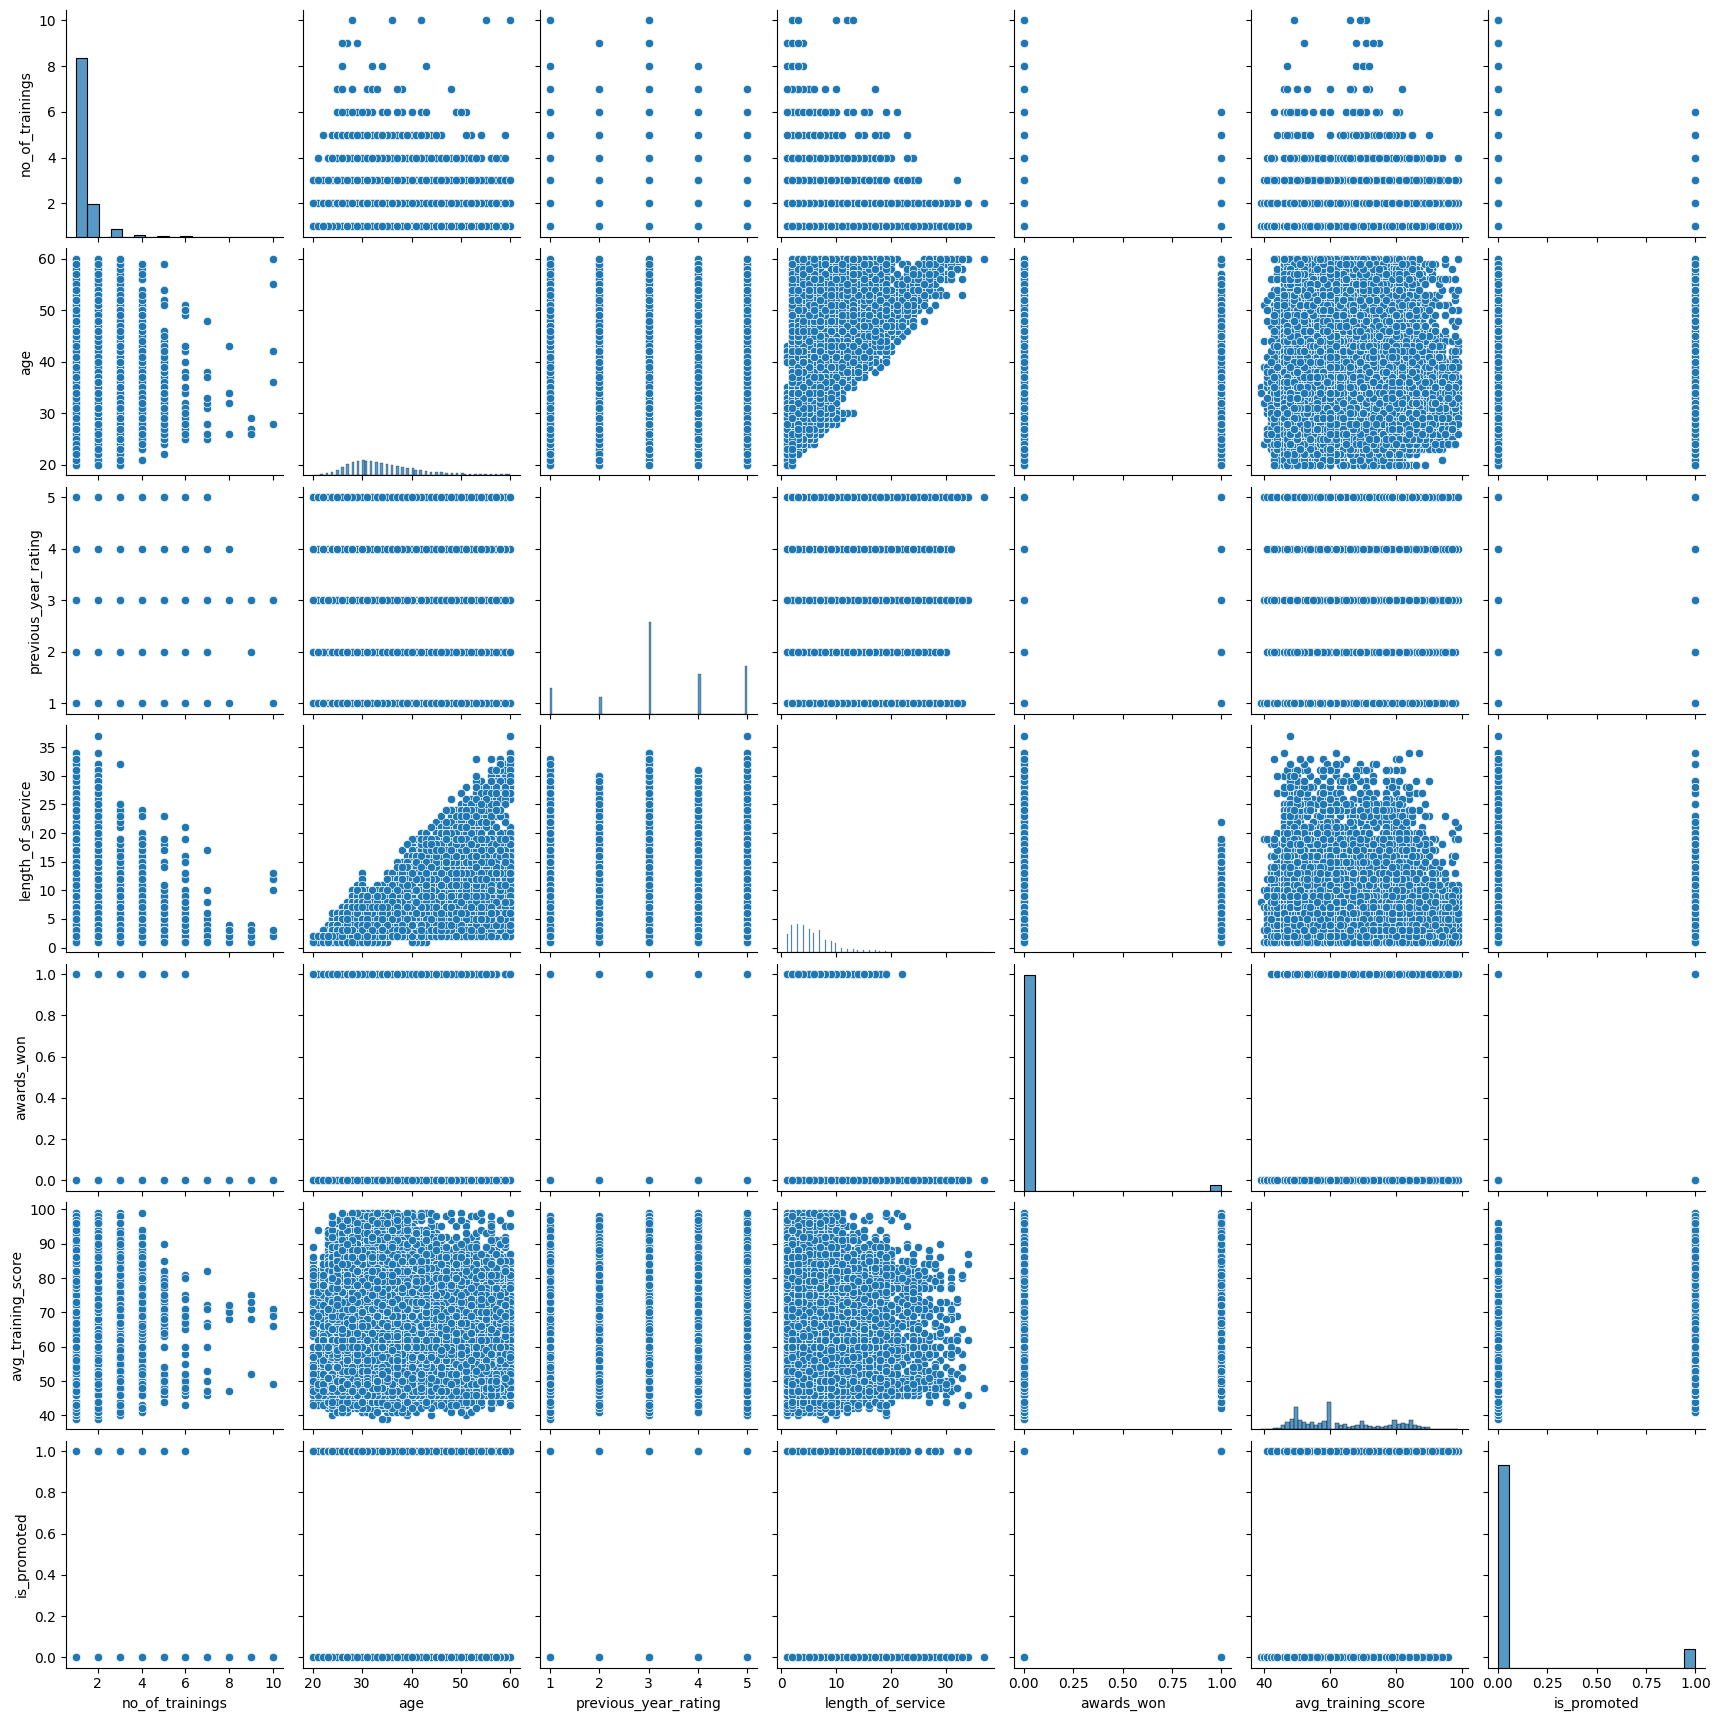

In [ ]:
sns.pairplot(dfemp_num)
plt.show()

## Categorical Data

In [ ]:
dfemp_cat.keys()

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [ ]:
dfemp_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   department           54808 non-null  object
 1   region               54808 non-null  object
 2   education            54808 non-null  object
 3   gender               54808 non-null  object
 4   recruitment_channel  54808 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [ ]:
dfemp_cat.head(5)

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


## Encode Columns

The categorical variables are being encoded to be used for machine learning models

In [ ]:
# Label encode categorical features
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical feature
for column in categorical_columns:
    dfemp[column] = label_encoder.fit_transform(dfemp[column])

# Display the first 5 rows of the DataFrame
dfemp.head(5)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5,8,0,49,0
1,4,14,0,1,0,1,30,5,4,0,60,0
2,7,10,0,1,2,1,34,3,7,0,50,0
3,7,15,0,1,0,2,39,1,10,0,50,0
4,8,18,0,1,0,1,45,3,2,0,73,0


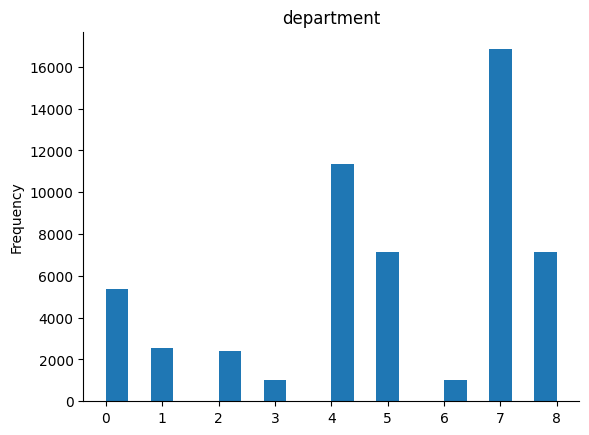

In [ ]:
# Visualize department against frequency

from matplotlib import pyplot as plt
dfemp['department'].plot(kind='hist', bins=20, title='department')
plt.gca().spines[['top', 'right',]].set_visible(False)

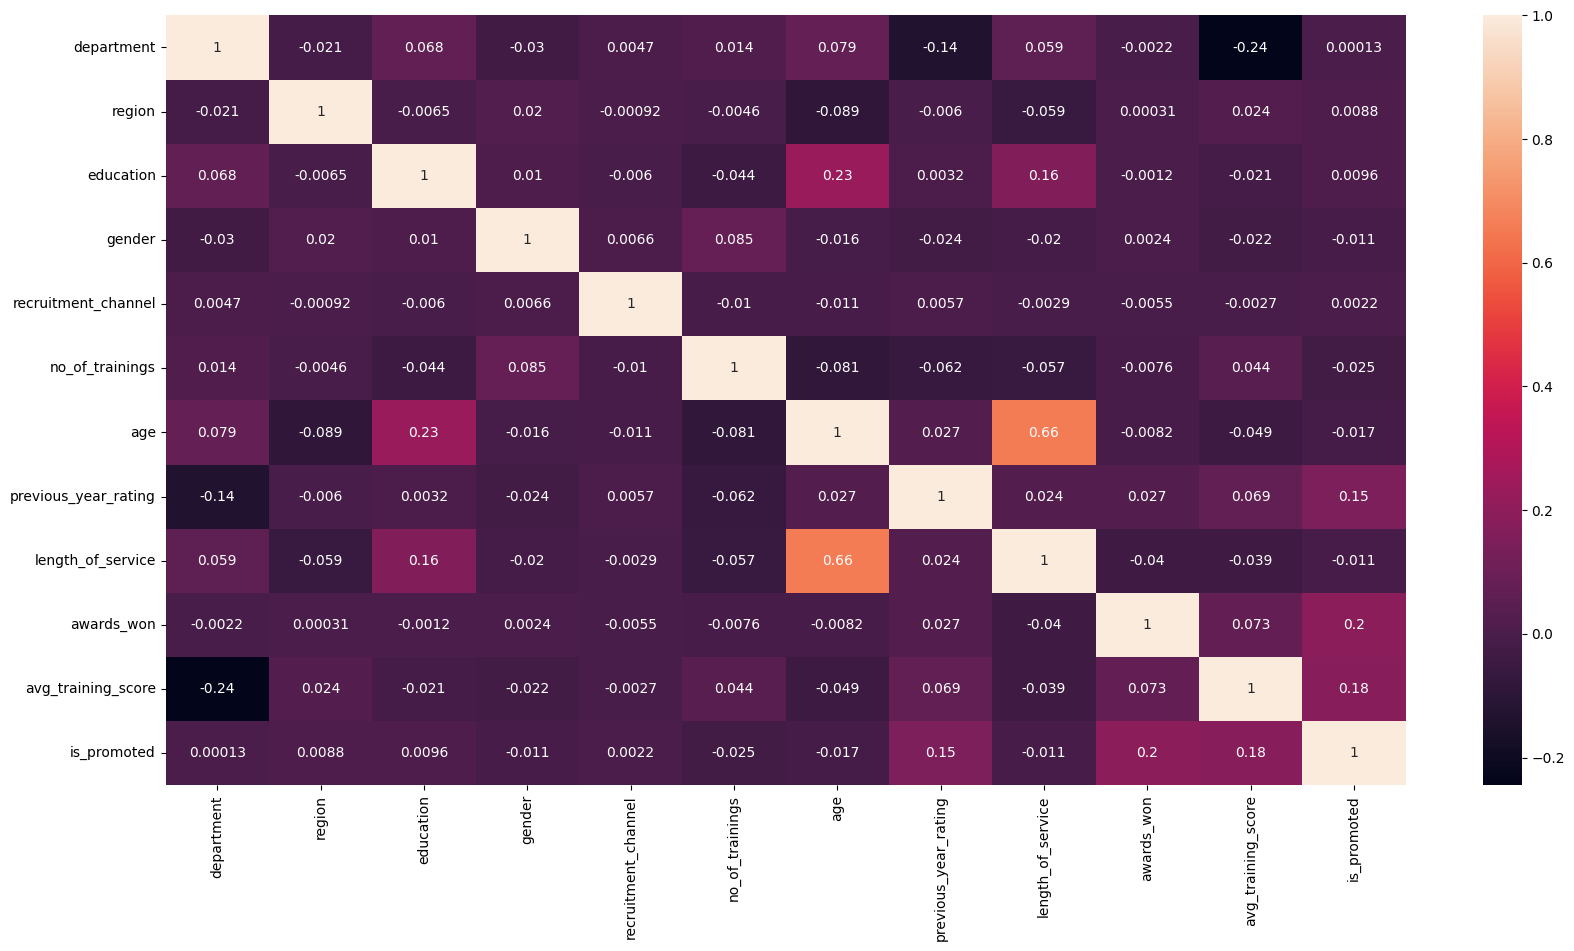

In [ ]:
# Visualize Dataframe Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(dfemp.corr(), annot=True)
plt.show()

# Data Sampling

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [ ]:
dfemp.keys()

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
dfemp.head(5)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5,8,0,49,0
1,4,14,0,1,0,1,30,5,4,0,60,0
2,7,10,0,1,2,1,34,3,7,0,50,0
3,7,15,0,1,0,2,39,1,10,0,50,0
4,8,18,0,1,0,1,45,3,2,0,73,0


we attempt to seperate the features from the target

In [ ]:
# Separate features and target
X = dfemp.drop(columns=['is_promoted'])
y = dfemp['is_promoted']

In [ ]:
# Print the original class distribution
print("Original class distribution:")
print(Counter(y))

Original class distribution:
Counter({0: 50140, 1: 4668})


In [ ]:
# Apply SMOTETomek for hybrid sampling
smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X, y)

# Combine the resampled data into a new DataFrame
dfemp_resampled = pd.DataFrame(X_resampled, columns=X.columns)
dfemp_resampled['is_promoted'] = y_resampled

# Print the resampled class distribution
print("\nResampled class distribution:")
print(Counter(dfemp_resampled['is_promoted']))


Resampled class distribution:
Counter({0: 49515, 1: 49515})


In [ ]:
dfemp_resampled.shape

(99030, 12)

In [ ]:
dfemp_resampled.head(5)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5,8,0,49,0
1,4,14,0,1,0,1,30,5,4,0,60,0
2,7,10,0,1,2,1,34,3,7,0,50,0
3,7,15,0,1,0,2,39,1,10,0,50,0
4,8,18,0,1,0,1,45,3,2,0,73,0


# Feature Selection

In [ ]:
# Apply SelectKBest algorithm with chi-squared statistical test to select top features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# You may adjust the 'k' parameter based on the number of top features you want to select
k_best = SelectKBest(score_func=chi2, k=5)
selected_features = k_best.fit_transform(X_resampled, y_resampled)

# Get the indices of selected features
selected_indices = k_best.get_support(indices=True)
selected_feature_names = X_resampled.columns[selected_indices]

print("Selected Features:", selected_feature_names)

Selected Features: Index(['gender', 'recruitment_channel', 'previous_year_rating',
       'length_of_service', 'avg_training_score'],
      dtype='object')


The code below picks the best 5 columns to be used for the predcition

# New dataset

In [ ]:
dfemp_resampled.head(5)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5,8,0,49,0
1,4,14,0,1,0,1,30,5,4,0,60,0
2,7,10,0,1,2,1,34,3,7,0,50,0
3,7,15,0,1,0,2,39,1,10,0,50,0
4,8,18,0,1,0,1,45,3,2,0,73,0


In [ ]:
Newdf = dfemp_resampled.loc[:,['gender', 'recruitment_channel', 'previous_year_rating', 'length_of_service', 'avg_training_score', 'is_promoted']]

In [ ]:
Newdf.head(5)

,gender,recruitment_channel,previous_year_rating,length_of_service,avg_training_score,is_promoted
0,0,2,5,8,49,0
1,1,0,5,4,60,0
2,1,2,3,7,50,0
3,1,0,1,10,50,0
4,1,0,3,2,73,0


In [ ]:
Newdf.shape

(99030, 6)

# Split the dataset

In [ ]:
# Separate features and target
a = Newdf.drop(columns=['is_promoted'])
b = Newdf['is_promoted']

In [ ]:
from sklearn.model_selection import train_test_split #import the train test split library

In [ ]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

# Machine Learning - using new dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train model
lrmodel = LogisticRegression()
lrmodel.fit(a_train, b_train)

# Make predictions
Lrpred = lrmodel.predict(a_test)

In [ ]:
# Evaluate
Lraccuracy = accuracy_score(b_test, Lrpred)
print(f'Accuracy: {Lraccuracy:.2f}')

Accuracy: 0.66


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train model
dtmodel = DecisionTreeClassifier()
dtmodel.fit(a_train, b_train)

# Make predictions
Dtpred = dtmodel.predict(a_test)
Dtpred

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
# Evaluate
Dtaccuracy = accuracy_score(b_test, Dtpred)
print(f'Accuracy: {Dtaccuracy:.2f}')

Accuracy: 0.73


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest classifier
rfmodel = RandomForestClassifier()
rfmodel.fit(a_train, b_train)

# Predict on the test set
Rfpred = rfmodel.predict(a_test)

In [ ]:
# Evaluate accuracy
Rfaccuracy = accuracy_score(b_test, Rfpred)
print("Random Forest Accuracy:", Rfaccuracy)

Random Forest Accuracy: 0.7353327274563264


## Support Vector Machine

In [ ]:
from sklearn.svm import SVC

# Initialize and train model
svmmodel = SVC()
svmmodel.fit(a_train, b_train)

# Make predictions
svmpred = svmmodel.predict(a_test)

In [ ]:
# Evaluate
svmaccuracy = accuracy_score(b_test, svmpred)
print(f'Accuracy: {svmaccuracy:.2f}')

Accuracy: 0.66


## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train model
gbmodel = GradientBoostingClassifier()
gbmodel.fit(a_train, b_train)

# Make predictions
gbpred = gbmodel.predict(a_test)

In [ ]:
# Evaluate
gbaccuracy = accuracy_score(b_test, gbpred)
print(f'Accuracy: {gbaccuracy:.2f}')

Accuracy: 0.71


## Hybrid Model

Hybrid model makes use of the two best models observed and combines them to form a new model.
The best two models are decision tree and random forest

In [ ]:
from sklearn.ensemble import StackingClassifier

# Define base models
base_models = [
    ('decision_tree', DecisionTreeClassifier(max_depth=3)),
    ('random_forest', RandomForestClassifier(n_estimators=100))
]

# Define meta-model
meta_model = LogisticRegression()

# Create stacking model
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

In [ ]:
# Train the stacking model
stacking_model.fit(a_train, b_train)

# Make predictions
Hypred = stacking_model.predict(a_test)

In [ ]:
# Evaluate the model
Hyaccuracy = accuracy_score(b_test, Hypred)
print(f'Accuracy of hybrid model: {Hyaccuracy:.2f}')

Accuracy of hybrid model: 0.74


# Split the dataset 2

In [ ]:
# Separate features and target
A = dfemp_resampled.drop(columns=['is_promoted'])
B = dfemp_resampled['is_promoted']

In [ ]:
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=42)

# Machine Learning - using the entire dataset

An attempt was made to check if a higher accuracy would be gotten using the entire dataset

## Logistic Regression

In [ ]:
# Initialize and train model
lr2model = LogisticRegression()
lr2model.fit(A_train, B_train)

# Make predictions
Lr2pred = lr2model.predict(A_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Evaluate
Lr2accuracy = accuracy_score(B_test, Lr2pred)
print(f'Accuracy: {Lr2accuracy:.2f}')

Accuracy: 0.67


## Decision Tree

In [ ]:
# Initialize and train model
dt2model = DecisionTreeClassifier()
dt2model.fit(A_train, B_train)

# Make predictions
Dt2pred = dt2model.predict(A_test)
Dt2pred

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
# Evaluate
Dt2accuracy = accuracy_score(B_test, Dt2pred)
print(f'Accuracy: {Dt2accuracy:.2f}')

Accuracy: 0.89


## Random Forest

In [ ]:
# Train Random Forest classifier
rf2model = RandomForestClassifier()
rf2model.fit(A_train, B_train)

# Predict on the test set
Rf2pred = rf2model.predict(A_test)

In [ ]:
# Evaluate accuracy
Rf2accuracy = accuracy_score(B_test, Rf2pred)
print("Random Forest Accuracy:", Rf2accuracy)

Random Forest Accuracy: 0.936988791275371


## Support Vector Machine

In [ ]:
# Initialize and train model
svm2model = SVC()
svm2model.fit(A_train, B_train)

# Make predictions
svm2pred = svm2model.predict(A_test)

In [ ]:
# Evaluate
svm2accuracy = accuracy_score(B_test, svm2pred)
print(f'Accuracy: {svm2accuracy:.2f}')

Accuracy: 0.68


## Gradient Boosting Classifier

In [ ]:
# Initialize and train model
gbm2odel = GradientBoostingClassifier()
gbm2odel.fit(A_train, B_train)

# Make predictions
gb2pred = gbm2odel.predict(A_test)

In [ ]:
# Evaluate
gb2accuracy = accuracy_score(B_test, gb2pred)
print(f'Accuracy: {gb2accuracy:.2f}')

Accuracy: 0.78


## Hybrid Model

Hybrid model makes use of the two best models observed and combines them to form a new model.
The best two models are decision tree and random forest

In [ ]:
# Define base models
base_models2 = [
    ('decision_tree', DecisionTreeClassifier(max_depth=3)),
    ('random_forest', RandomForestClassifier(n_estimators=100))
]

# Define meta-model
meta_model2 = LogisticRegression()

# Create stacking model
stacking_model2 = StackingClassifier(
    estimators=base_models2,
    final_estimator=meta_model2,
    cv=5
)

In [ ]:
# Train the stacking model
stacking_model2.fit(A_train, B_train)

# Make predictions
Hy2pred = stacking_model2.predict(A_test)

In [ ]:
# Evaluate the model
Hy2accuracy = accuracy_score(b_test, Hy2pred)
print(f'Accuracy of hybrid model: {Hy2accuracy:.2f}')

Accuracy of hybrid model: 0.94


# General Visualization

In [ ]:
Lr = Lraccuracy
Dt = Dtaccuracy
Rf = Rfaccuracy
SVM = svmaccuracy
GB = gbaccuracy
Hy = Hyaccuracy
Lr2 = Lr2accuracy
Dt2 = Dt2accuracy
Rf2 = Rf2accuracy
SVM2 = svm2accuracy
GB2 = gb2accuracy
Hy2 = Hy2accuracy

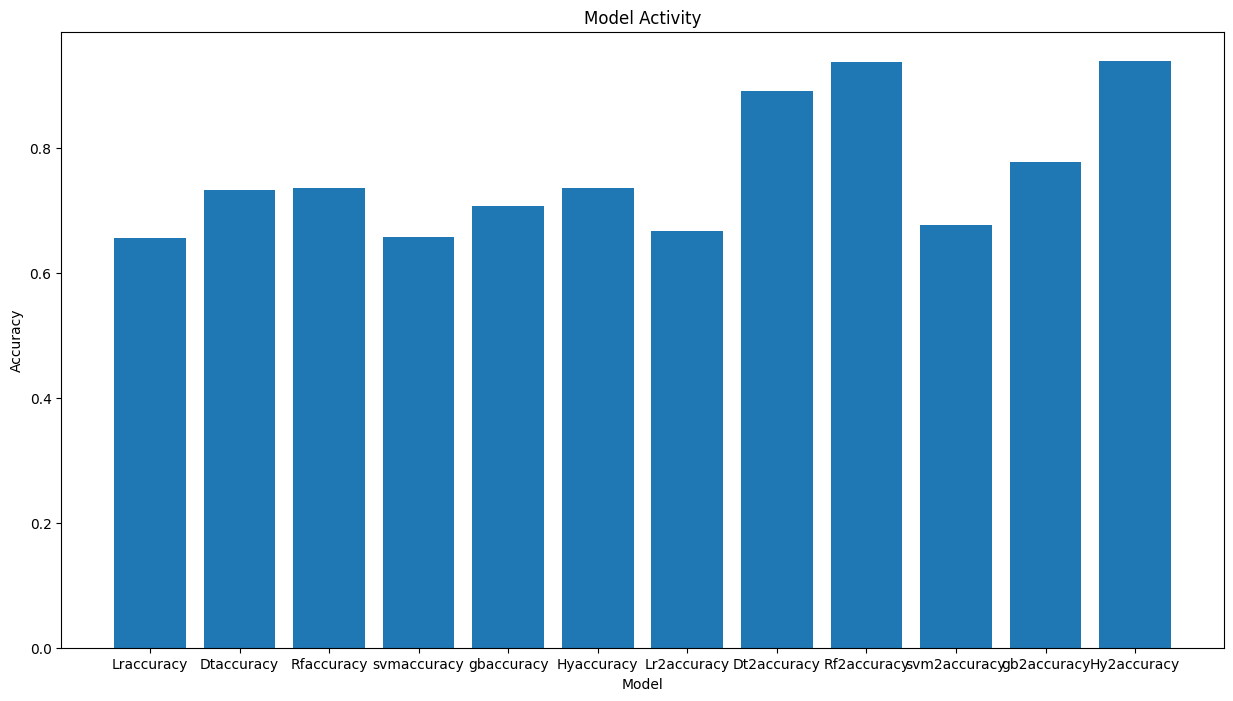

In [ ]:
plt.figure(figsize=(15, 8))

x_axis = ['Lraccuracy','Dtaccuracy','Rfaccuracy','svmaccuracy','gbaccuracy', 'Hyaccuracy',
          'Lr2accuracy','Dt2accuracy','Rf2accuracy','svm2accuracy','gb2accuracy', 'Hy2accuracy']
y_axis = [Lr, Dt, Rf, SVM, GB, Hy, Lr2, Dt2, Rf2, SVM2, GB2, Hy2]

plt.bar(x_axis, y_axis)
plt.title('Model Activity')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Determine the model with the least error
max_error_model = max(Lraccuracy,Dtaccuracy,Rfaccuracy,svmaccuracy,gbaccuracy, Hyaccuracy,
                      Lr2accuracy, Dt2accuracy, Rf2accuracy, svm2accuracy, gb2accuracy, Hy2accuracy)


if max_error_model == Lraccuracy:
    print("Logisitc Regression has the highest accuracy.")
elif max_error_model == Dtaccuracy:
    print("Decision Tree has the highest accuracy.")
elif max_error_model == Rfaccuracy:
    print("Random Forest has the highest accuracy.")
elif max_error_model == svmaccuracy:
    print("SVM has the highest accuracy.")
elif max_error_model == gbaccuracy:
    print("GB has the highest accuracy.")
elif max_error_model == Lr2accuracy:
    print("Logisitc Regression2 has the highest accuracy.")
elif max_error_model == Dt2accuracy:
    print("Decision Tree2 has the highest accuracy.")
elif max_error_model == Rf2accuracy:
    print("Random Forest2 has the highest accuracy.")
elif max_error_model == svm2accuracy:
    print("SVM2 has the highest accuracy.")
elif max_error_model == gb2accuracy:
    print("GB2 has the highest accuracy.")
elif max_error_model == Hyaccuracy:
    print("Hybrid Model has the highest accuracy.")
else:
    print("Hybrid Model2 has the highest accuracy.")

Hybrid Model2 has the highest accuracy.


Creating a dataframe for the accuracy values for easy view and comparison.
This would help us compare the result of using feature selection and the results without feature selection

In [ ]:
# Create a dictionary with the model names and their accuracies
data = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "Gradient Boosting", "Hybrid",
              "Logistic Regression 2", "Decision Tree 2", "Random Forest 2", "SVM 2", "Gradient Boosting 2", "Hybrid 2"],
    "Accuracy": [Lraccuracy, Dtaccuracy, Rfaccuracy, svmaccuracy, gbaccuracy, Hyaccuracy,
                 Lr2accuracy, Dt2accuracy, Rf2accuracy, svm2accuracy, gb2accuracy, Hy2accuracy]
}

# Convert the dictionary to a DataFrame
accuracy_df = pd.DataFrame(data)

# Display the table
print(accuracy_df)

                    Model  Accuracy
0     Logistic Regression  0.655811
1           Decision Tree  0.732960
2           Random Forest  0.735333
3                     SVM  0.657881
4       Gradient Boosting  0.707917
5                  Hybrid  0.736444
6   Logistic Regression 2  0.667121
7         Decision Tree 2  0.891649
8         Random Forest 2  0.936989
9                   SVM 2  0.675957
10    Gradient Boosting 2  0.777088
11               Hybrid 2  0.939160


In [ ]:
accuracy_df

,Model,Accuracy
0,Logistic Regression,0.655811
1,Decision Tree,0.732960
2,Random Forest,0.735333
3,SVM,0.657881
4,Gradient Boosting,0.707917
5,Hybrid,0.736444
6,Logistic Regression 2,0.667121
7,Decision Tree 2,0.891649
8,Random Forest 2,0.936989
9,SVM 2,0.675957


In [ ]:
Hy2accuracy
print(f'Accuracy of hybrid model: {Hy2accuracy:.2f}')

Accuracy of hybrid model: 0.94


Hybrid Model2 has the highest accuracy level of 94%.